<a href="https://colab.research.google.com/github/lavrut/Data-science/blob/master/NYC_2021_ACS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pygris

Using FIPS code '36' for input 'NY'
Using FIPS code '061' for input 'New York'
Using FIPS code '047' for input 'Kings'
Using FIPS code '081' for input 'Queens'
Using FIPS code '085' for input 'Richmond'
Using FIPS code '005' for input 'Bronx'


Text(0.5, 1.0, 'Median household income, 2017-2021 ACS')

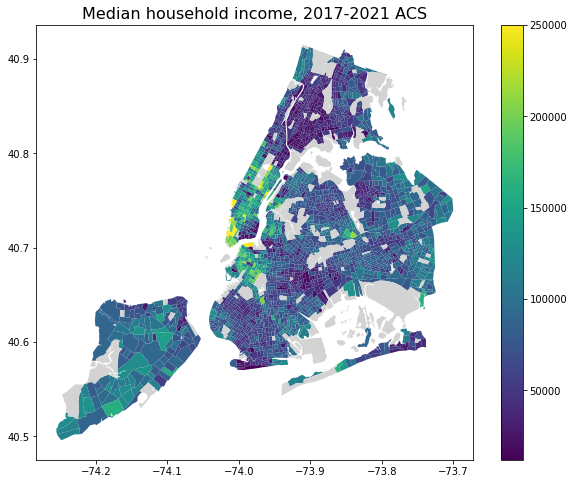

In [ ]:
from pygris import tracts
from pygris.data import get_census
from pygris.utils import erase_water
from matplotlib import pyplot as plt

nyc_tracts = tracts(state = "NY", county = ["New York", "Kings", "Queens", "Richmond", "Bronx"],
                    cb = True, year = 2021)

nyc_tracts_erase = erase_water(nyc_tracts, year = 2021)

ny_income = get_census(dataset = "acs/acs5",
                       year = 2021,
                       variables = "B19013_001E",
                       params = {"for": "tract:*",
                                 "in": "state:36"},
                       return_geoid = True,
                       guess_dtypes = True)

nyc_tract_income = nyc_tracts_erase.merge(ny_income, on = "GEOID")

nyc_tract_income.plot(column = "B19013_001E", figsize = (10, 8), legend = True,
                      missing_kwds = dict(color = "lightgrey"))

plt.title("Median household income, 2017-2021 ACS", fontsize = 16)